# Implementasi Mobile Legend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from IPython.display import display

In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

## Data Hero

In [2]:
# data Hero
dh = pd.read_csv('MobileLegend\\Hero.csv',index_col=0) # nama file sesuaikan dgn os

# ubah data na jadi none
dh = dh.fillna(value='None')

display(dh)

# fungsi hitung nilai na
def combiner(x,y):
    if pd.isna(x):
        x = 0
    
    if pd.isna(y):
        y=0
        
    return y+x

#dh.to_csv('MobileLegend\\Hero.csv')

,Nama,Role,Role lainnya,Tipe,Tipe lainnya
Rilis,,,,,
20090101,Miya,MM,None,Reap,Damage
20090102,Balmond,FIGHTER,TANK,Damage,Regen
20090103,Saber,ASS,None,Charge,Reap
20090104,Alice,MAGE,TANK,Charge,Regen
20090105,Nana,MAGE,SUPPORT,Poke,Guard
...,...,...,...,...,...
20090413,Gloo,TANK,None,Regen,Control
20090414,Beatrik,MM,None,Reap,Damage
20090415,Yve,MAGE,None,Poke,Burst


{'Max': {'index': 'FIGHTER', 'value': 33.0}, 'Min': {'index': 'SUPPORT', 'value': 11.0}, 'Range': {'index': 5, 'value': 22.0}}


c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


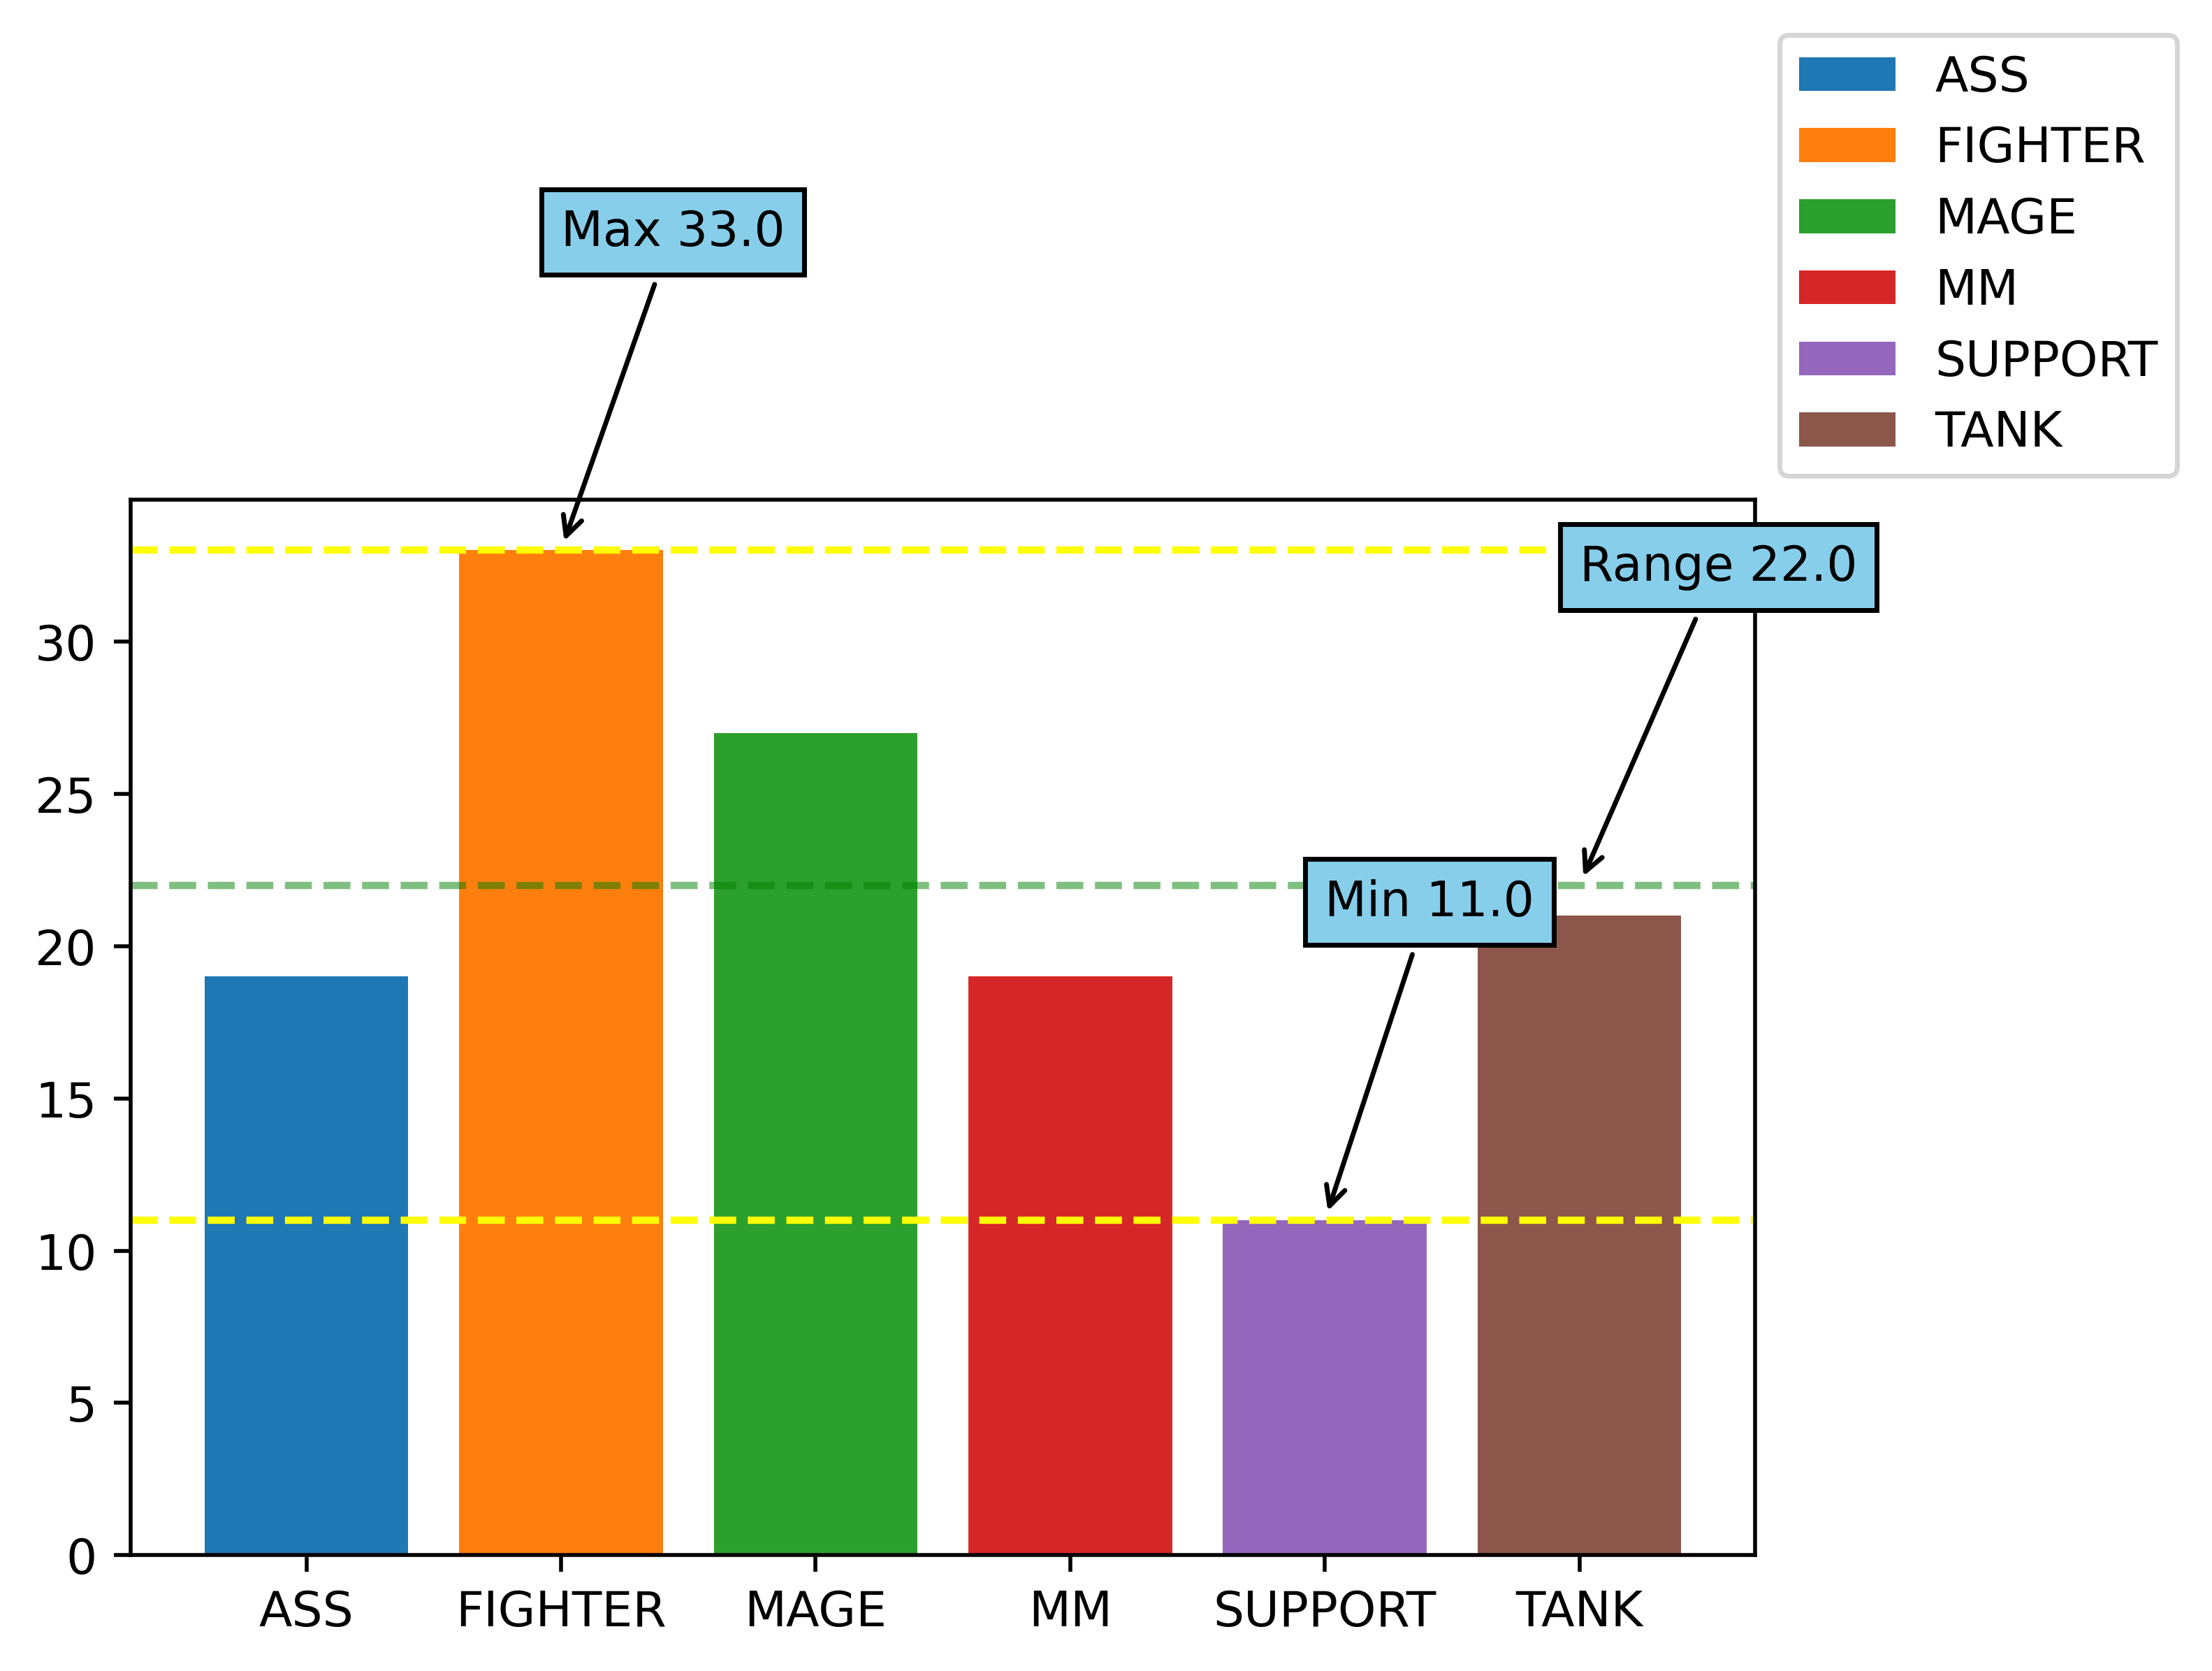

In [3]:
# Menyatukan kolom Role dengan Role lainnya
drm = dh[['Role','Role lainnya']]
drall = drm["Role"].value_counts()+drm["Role lainnya"].value_counts()

# Hapus index None
drall = drall.drop(index='None')

#display(drall)

#visualisasi Role berdasarkan dua column
drall_agg = {'Max': {'index':drall.idxmax(),'value':drall.max()},'Min' : {'index':drall.idxmin(),'value':drall.min()},
             'Range': {'index': 5,'value': max(drall.values) - min(drall.values)} }

print(drall_agg)

fig,ax = plot.subplots(dpi=500)

# bar drall
for index, val in drall.items():
    ax.bar(index,val,label=index)

# legend
ax.legend(bbox_to_anchor = (1,1),loc='lower left')
   
# axline dan annotate
for i in drall_agg:
    if i == 'Range':
        ax.axhline(drall_agg[i]['value'],color='green',linestyle='--',alpha=0.5)
    else:
        ax.axhline(drall_agg[i]['value'],color='yellow',linestyle='--')
        
    ax.annotate(xy=(drall_agg[i]['index'],drall_agg[i]['value']),s=i+' '+str(drall_agg[i]['value']),xycoords='data',xytext=(drall_agg[i]['index'],drall_agg[i]['value']+10),
           arrowprops=dict(arrowstyle='->'),bbox=dict(facecolor='skyblue'))

In [4]:
# create dataframe hero yang menampilakn role hero 
# beserta list hero nya

pd.set_option("display.max_colwidth",255) # set max-width

columns = ['Jumlah','Hero']
drs = pd.DataFrame(np.ndarray(shape=(len(drall.index),len(columns)),dtype='str'),index=drall.index,columns=columns)

# column jumlah
drs['Jumlah'] = drall.values

# column Hero hero(di isi nama-nama hero berdasarkan role)
hero = []
heroStr = ''

for row in drall.index:
    nameHero = ""
    nameHeroAr = []
    concat = [dh[dh['Role'] == row],dh[dh['Role lainnya'] == row]]
    roleAll = pd.concat(concat)
    for index,subrow in roleAll.iterrows():
        if(nameHero ==""):
            nameHero=subrow.Nama
        else:
            nameHero=nameHero+","+subrow.Nama
        nameHeroAr.append(subrow.Nama)
        
    hero.append(nameHero)

drs['Hero'] = hero

display(drs)

,Jumlah,Hero
ASS,19.0,"Saber,Fanny,Hayabusa,Selena,Ling,Benedetta,Karina,Natalia,Lancelot,Gusion,Helcurt,Hanzo,Alucard,Zilong,Mathilda,Yi Sun-Shin,Harley,Lesley,Kadita"
FIGHTER,33.0,"Balmond,Alucard,Zilong,Bane,Chou,Sun,Alpha,Ruby,Hilda,Lapu2,Jawhead,Kaja,Leomord,Thamus,Minshittar,Terizla,Badang,X-borg,Silvanna,Khaleed,Yu Zhong,Paquito,Freya,Argus,Roger,Aldous,Martis,Dyrroth,Guineverre,Masha,Phoveus,Gatotkaca,Barats"
MAGE,27.0,"Alice,Nana,Eudora,Gord,Cyclops,Aurora,Vexana,Odette,Zhask,Pharsa,Change,Vale,Lunox,Harith,Luo Yi,Kagura,Harley,Valir,Lylia,Esmeralda,Kadita,Cecillion,Yve,Selena,Kimmy,Faramis,Guineverre"
MM,19.0,"Miya,Bruno,Clint,Layla,Moskov,Karrie,Hanabi,Kimmy,Granger,Yi Sun-Shin,Irithel,Lesley,Claude,Popol Kupa,Wanwan,Brody,Beatrik,Natan,Roger"
SUPPORT,11.0,"Rafaela,Lolita,Faramis,Mathilda,Estes,Angela,Diggie,Carmilla,Nana,Minotaur,Kaja"
TANK,21.0,"Tigreal,Akai,Franco,Minotaur,Johnson,Gatotkaca,Grock,Hylos,Uranus,Belerick,Khufra,Baxia,Atlas,Barats,Gloo,Balmond,Alice,Lolita,Ruby,Hilda,Esmeralda"


Display Data Tipe hero


,Tipe,Tipe lainnya
Rilis,,
20090101,Reap,Damage
20090102,Damage,Regen
20090103,Charge,Reap
20090104,Charge,Regen
20090105,Poke,Guard
...,...,...
20090413,Regen,Control
20090414,Reap,Damage
20090415,Poke,Burst


Display Jumlah Tipe Hero


Burst           41
CC              18
Charge          11
Chase           20
Control          8
Damage          26
Guard           11
Init             9
Magic Damage     4
Mix Damage       2
Poke            13
Push             6
Reap            24
Regen           13
Support          5
dtype: int64

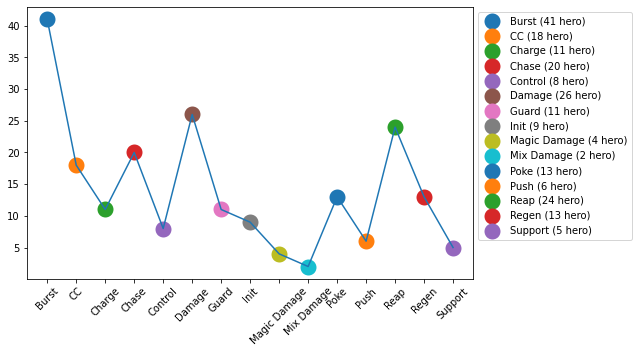

In [5]:
# select data hero berdasarkan tipe hero
dtm = dh[['Tipe','Tipe lainnya']]
print('Display Data Tipe hero')
display(dtm)

# create dataframe join hero berdasarkan column tipe dan tipe lainnya
dtm2 = dtm["Tipe"].value_counts().combine_first(dtm["Tipe lainnya"].value_counts())
dtm2 = pd.Series(np.zeros(len(dtm2),dtype='int64'),index=dtm2.index) # ubah nilai ke 0

# hitung nilai keseluruhan dari tipe hero
dtipe = dtm["Tipe"].value_counts().combine(dtm['Tipe lainnya'].value_counts(),combiner)
dtipe = dtipe.drop(index='None')

print('Display Jumlah Tipe Hero')
display(dtipe)

# visualisasi data
drti_agg = {'Max': {'index':dtipe.idxmax(),'value':dtipe.max()},'Min' : {'index':dtipe.idxmin(),'value':dtipe.min()},
             'Range': {'index': 5,'value': max(dtipe.values) - min(dtipe.values)} }

fig,ax = plot.subplots(figsize=(8,5))

label = ax.get_xticklabels()
plot.setp(label,rotation=45)

# plot
ax.plot(dtipe)

# scatter
for i,v in dtipe.items():
    ax.scatter(i,v,label=i+' ('+str(v)+' hero)',linewidth=10)

ax.legend(bbox_to_anchor=(1,1))
plot.show()


In [6]:
# menyatukan Tipe berdasarkan dua column dengan sederhana
columns = ['Jumlah','Tipe']
dts = pd.DataFrame(np.ndarray(shape=(len(dtipe.index),len(columns)),dtype='str'),index=dtipe.index,columns=columns)

# set jumlah
dts['Jumlah'] = dtipe.values

# set hero
tipe = []

for row in dtipe.index:
    nameTipe = ""
    nameTipeAr = []
    concat = [dh[dh['Tipe'] == row],dh[dh['Tipe lainnya'] == row]]
    roleAll = pd.concat(concat)
    for index,subrow in roleAll.iterrows():
        if(nameTipe ==""):
            nameTipe=subrow.Nama
        else:
            nameTipe=nameTipe+","+subrow.Nama
        nameTipeAr.append(subrow.Nama)
        
    tipe.append(nameTipe)

dts['Tipe'] = tipe

display(dts)

,Jumlah,Tipe
Burst,41,"Odette,Pharsa,Vale,Lunox,Terizla,Granger,Harley,Gusion,Claude,Aldous,Guineverre,Kadita,Brody,Natan,Bruno,Clint,Eudora,Bane,Hayabusa,Gord,Lapu2,Gatotkaca,Jawhead,Change,Leomord,Badang,X-borg,Ling,Benedetta,Lancelot,Argus,Irithel,Roger,Lesley,Helcurt,Ha..."
CC,18,"Tigreal,Minotaur,Ruby,Aurora,Gatotkaca,Grock,Belerick,Atlas,Carmilla,Akai,Lolita,Johnson,Vale,Minshittar,Terizla,Khufra,Luo Yi,Barats"
Charge,11,"Saber,Alice,Alpha,Jawhead,Badang,Argus,Dyrroth,Kaja,Faramis,Martis,Kadita"
Chase,20,"Alucard,Zilong,Fanny,Hayabusa,Chou,Lapu2,Zhask,Leomord,Thamus,Harith,Ling,Benedetta,Paquito,Natalia,Freya,Lancelot,Phoveus,Moskov,Yi Sun-Shin,Claude"
Control,8,"Eudora,Kaja,Franco,Chou,Cyclops,Vexana,Gloo,Phoveus"
Damage,26,"Balmond,Hilda,Kimmy,Khaleed,Valir,Barats,Miya,Alucard,Zilong,Layla,Sun,Alpha,Karrie,Zhask,Hanabi,Lunox,Thamus,Harith,Baxia,Yu Zhong,Paquito,Freya,Lylia,Carmilla,Masha,Beatrik"
Guard,11,"Akai,Lolita,Hylos,Faramis,Angela,Diggie,Nana,Rafaela,Mathilda,Estes,Valir"
Init,9,"Franco,Selena,Minshittar,Khufra,Silvanna,Mathilda,Grock,Hylos,Atlas"
Magic Damage,4,"Silvanna,Karina,Gusion,Guineverre"
Mix Damage,2,"Kimmy,Esmeralda"


In [7]:
# example memilih hero dengan  role dan tipe yang bervariasi
role = ['FIGHTER','ASS'] #['ASS','FIGHTER','MAGE','MM','SUPPORT','TANK']
tipe = ['Chase']

concat = [dh[dh['Role'].isin(role)], dh[dh['Role lainnya'].isin(role)]]


roleAll = pd.concat(concat)

#print(roleAll.loc[20090101:20090110,['Tipe','Tipe lainnya']]) # index,column
#print(roleAll.loc[(roleAll.Tipe == 'Burst') | (roleAll['Tipe lainnya'] == 'Burst')]) # column dengan logical operator

role_selection = roleAll[(roleAll['Tipe'].isin(tipe)) | (roleAll['Tipe lainnya'].isin(tipe))]

print(role_selection.sort_values(['Role','Role lainnya'])) # column dengan logical operator

                 Nama     Role Role lainnya   Tipe Tipe lainnya
Rilis                                                          
20090115        Fanny      ASS         None  Chase         Reap
20090120     Hayabusa      ASS         None  Chase        Burst
20090301         Ling      ASS         None  Chase        Burst
20090307    Benedetta      ASS         None  Chase        Burst
20090315      Natalia      ASS         None  Chase         Reap
20090317     Lancelot      ASS         None  Chase        Burst
20090107      Alucard  FIGHTER          ASS  Chase       Damage
20090114       Zilong  FIGHTER          ASS  Chase       Damage
20090107      Alucard  FIGHTER          ASS  Chase       Damage
20090114       Zilong  FIGHTER          ASS  Chase       Damage
20090122         Chou  FIGHTER         None  Chase      Control
20090131        Lapu2  FIGHTER         None  Chase        Burst
20090216      Leomord  FIGHTER         None  Chase        Burst
20090220       Thamus  FIGHTER         N

## Atribut Hero

In [8]:
## get CSV atribut
#da = pd.read_csv(MobileLegend\\Attribut.csv',index_col=0)

## get CSV atribut yang nilai index sudah dirubah
dan = pd.read_csv('MobileLegend\\AttributNewIndex.csv',index_col=0)

# changesome att
#dan['att spd'] = dan['att spd'].str.replace(",",".")
#dan['att spd'] = dan['att spd'].astype('float64')

#dan = dan.rename(columns={'magic defend': 'mag def'})

# dan['crit redux'] = 0

dan

,hp,mana,hp regen,mana regen,mov spd,att spd,cooldown,crit chance,spell vamp,phy att,phy def,phy pen,phy lifesteal,mag pow,mag def,mag pen,mag lifesteal,crit redux
Rilis,,,,,,,,,,,,,,,,,,
20090101,2524,445,6.0,3.0,240,0.850,0,0,0,100,17,0,0,0,15,0,0,0
20090102,2736,0,9.4,0.0,260,0.850,0,0,0,119,25,0,0,0,15,0,0,0
20090103,2599,443,7.0,3.2,260,0.870,0,0,0,118,20,0,0,0,15,0,0,0
20090104,2573,10,7.2,3.6,240,0.800,0,0,0,114,21,0,0,0,15,0,0,0
20090105,2501,10,6.8,3.6,250,0.864,0,0,0,115,17,0,0,0,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090413,2819,440,12.4,4.0,245,0.796,0,0,0,120,18,0,0,0,15,0,0,0
20090414,2550,0,7.2,0.0,257,0.858,0,0,0,105,20,0,0,0,15,0,0,0
20090415,2651,510,7.2,4.2,255,0.784,0,0,0,115,19,0,0,0,15,0,0,0


In [9]:
# pengurutan berdasarkan data attribut yang paling besar dan paling kecil 
#dan['mana regen'] = dan['mana regen'].str.replace(',','.')

#dan['mana regen'] = dan['mana regen'].astype('float64')

dan.dtypes
#dan.to_csv("MobileLegend\\AttributNewIndex.csv")

hp                 int64
mana               int64
hp regen         float64
mana regen       float64
mov spd            int64
att spd          float64
cooldown           int64
crit chance        int64
spell vamp         int64
phy att            int64
phy def            int64
phy pen            int64
phy lifesteal      int64
mag pow            int64
mag def            int64
mag pen            int64
mag lifesteal      int64
crit redux         int64
dtype: object

In [10]:
# function selection
def selection(data,dataframe,column,ch):
    if(len(data) == 0):
        return dataframe.sort_values(ch,ascending = False)
    else:
        return dataframe[(dataframe[column[0]].isin(data)) | (dataframe[column[1]].isin(data))].sort_values(ch,ascending = False)

# join data hero dan data attribut new
djd = pd.concat([dh,dan],axis=1)

rj = ['TANK'] ## role hero -> pilih role yang tersedia dibawah
## 'ASS', 'FIGHTER', 'MAGE', 'MM', 'SUPPORT', 'TANK'

tj = ['Burst'] ## tipe hero-> pilih tipe yang tersedia dibawah
## 'Burst','CC','Charge','Chase','Control','Damage','Guard','Init','Magic Damage',
## 'Mix Damage','Poke','Push','Reap','Regen','Support'

# choice untuk pengurutan dan seleksi pada proses visualisasi pada line berikutnya
choice = 'mana' ## pilih salah satu columns
## 'hp', 'mana', 'hp regen', 'mana regen', 'mov spd', 'att spd',
## 'cooldown', 'crit chance', 'spell vamp', 'phy att', 'phy def',
## 'phy pen', 'phy lifesteal', 'mag pow', 'mag def', 'mag pen',
## 'mag lifesteal','crit redux'

# column data atribut new
column_tambahan_full = dan.columns.tolist() ## column tambahan yang ingin ditampilkan

# opsi column jika hanya menambahkan beberapa saja
column_tambahan = ['hp']

# columns dari data hero + column tambahan dari data atribut yang ingin ditampilkan
column = dh.columns.tolist() + column_tambahan_full

# re column data
djd = djd[column]

# show data berdasarkan role atau tipe dengan sorting choice
# print("Sorting Data dengan Kolom",choice,"dengan role ",rj)
dataselect = selection(rj,djd,['Role','Role lainnya'],choice)

dataselecttipe = selection(tj,djd,['Tipe','Tipe lainnya'],choice)
    
dataselecttipe


,Nama,Role,Role lainnya,Tipe,Tipe lainnya,hp,mana,hp regen,mana regen,mov spd,...,spell vamp,phy att,phy def,phy pen,phy lifesteal,mag pow,mag def,mag pen,mag lifesteal,crit redux
Rilis,,,,,,,,,,,,,,,,,,,,,
20090408,Cecillion,MAGE,None,Poke,Burst,2516,700,6.8,6.0,255,...,0,105,20,0,0,0,15,0,0,0
20090121,Gord,MAGE,None,Poke,Burst,2478,570,6.4,5.0,240,...,0,110,13,0,0,0,15,0,0,0
20090217,Lunox,MAGE,None,Burst,Damage,2621,540,6.8,4.6,240,...,0,115,15,0,0,0,15,0,0,0
20090415,Yve,MAGE,None,Poke,Burst,2651,510,7.2,4.2,255,...,0,115,19,0,0,0,15,0,0,0
20090212,Change,MAGE,None,Poke,Burst,2301,505,6.8,4.2,240,...,0,115,16,0,0,0,15,0,0,0
20090405,Kadita,MAGE,ASS,Burst,Charge,2491,495,7.2,3.6,240,...,0,105,18,0,0,0,15,0,0,0
20090205,Odette,MAGE,None,Burst,Poke,2491,495,6.8,4.6,240,...,0,105,18,0,0,0,15,0,0,0
20090208,Pharsa,MAGE,None,Burst,Poke,2421,490,6.8,3.6,240,...,0,109,17,0,0,0,15,0,0,0
20090215,Vale,MAGE,None,Burst,CC,2401,490,6.8,4.2,250,...,0,115,15,0,0,0,15,0,0,0


c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'tex

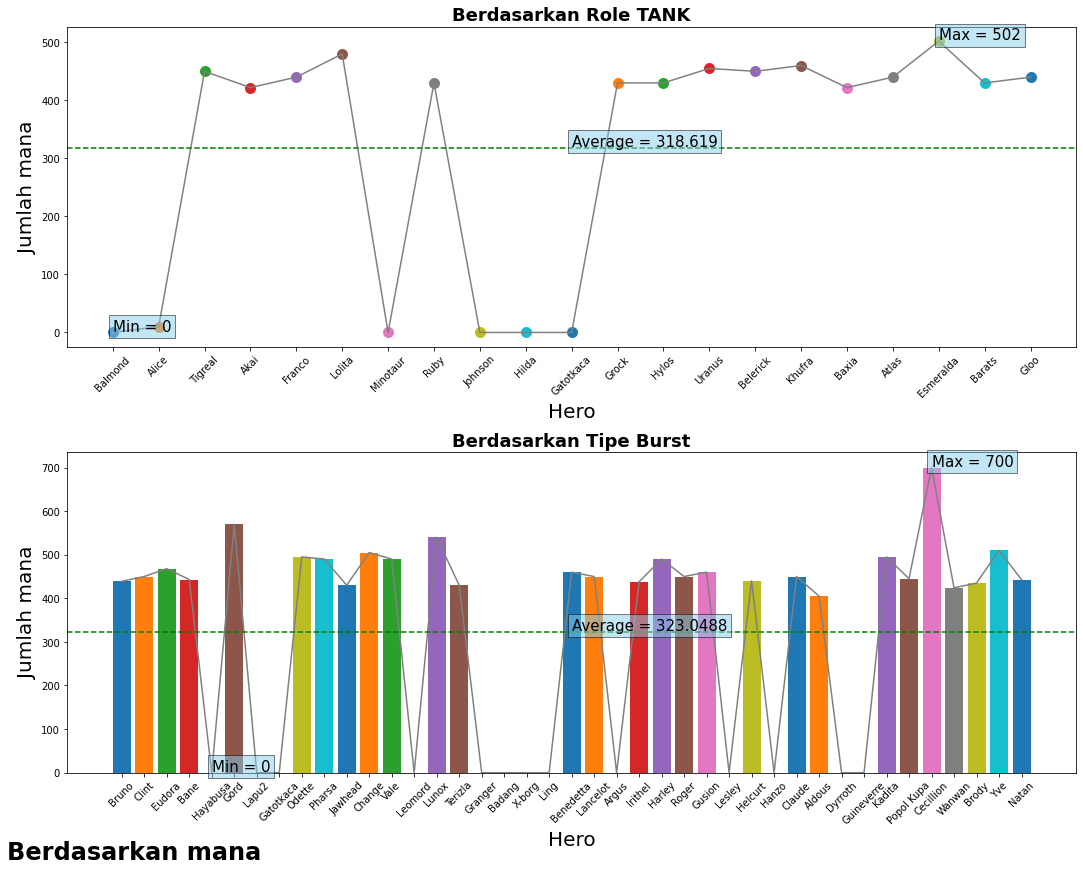

In [11]:
# visualisasi berdasarkan data pada line sebelumnya

# create series

## berdasarkan role
sv = pd.Series(dataselect[choice].sort_index().tolist(),index=dataselect['Nama'].sort_index().tolist())

## berdasarkan tipe
st = pd.Series(dataselecttipe[choice].sort_index().tolist(),index=dataselecttipe['Nama'].sort_index().tolist())

# create fig, axes
fig, ax = plot.subplots(2,1,figsize=(15,12))

fig.text(0,0,'Berdasarkan '+choice, fontsize=24,fontweight='bold')

## ax 0[Role]
for i,v in sv.items():
    ax[0].scatter(i,v,linewidth=5,label=i)
    
ax[0].plot(sv,color='gray')
#ax[0].legend(bbox_to_anchor = (1,1),borderaxespad=0.)

### role title
ax[0].set_title('Berdasarkan Role '+' '.join(rj),fontsize=18,fontweight='bold')

ax[0].set_ylabel('Jumlah '+choice,fontsize=20)
ax[0].set_xlabel('Hero',fontsize=20)

### min max average
average = round(sum(sv) / len(sv),4)
limitasi = (sv.max()/100)*0.5 # batas tambahan annotate
centerAvg = round(len(sv.index)/2)

ax[0].annotate(xy=(sv.idxmax(),sv.max()+limitasi),s = 'Max = '+str(sv.max()),bbox=dict(facecolor='skyblue',alpha=0.5),fontsize=15)
ax[0].annotate(xy=(sv.idxmin(),sv.min()+limitasi),s = 'Min = '+str(sv.min()),bbox=dict(facecolor='skyblue',alpha=0.5),fontsize=15)
ax[0].annotate(xy=(sv.index[centerAvg],(sum(sv) / len(sv))+limitasi),s = 'Average = '+str(average),bbox=dict(facecolor='skyblue',alpha=0.5),fontsize=15)

ax[0].axhline(sum(sv) / len(sv),color='green',linestyle='--')

### rotation label    
label = ax[0].get_xticklabels()
plot.setp(label,rotation=45)

## ax 1 Tipe
for i,v in st.items():
    ax[1].bar(i,v,linewidth=5,label=i)
    
ax[1].plot(st,color='gray')
#ax[1].legend(bbox_to_anchor = (0,1),borderaxespad=0.)

### tipe title
ax[1].set_title('Berdasarkan Tipe '+' '.join(tj),fontsize=18,fontweight='bold')

ax[1].set_ylabel('Jumlah '+choice,fontsize=20)
ax[1].set_xlabel('Hero',fontsize=20)

### min max average
average = round(sum(st) / len(st),4)
limitasi = (st.max()/100)*0.5 # batas tambahan annotate
centerAvg = round(len(st.index)/2)

ax[1].annotate(xy=(st.idxmax(),st.max()+limitasi),s = 'Max = '+str(st.max()),bbox=dict(facecolor='skyblue',alpha=0.5),fontsize=15)
ax[1].annotate(xy=(st.idxmin(),st.min()+limitasi),s = 'Min = '+str(st.min()),bbox=dict(facecolor='skyblue',alpha=0.5),fontsize=15)
ax[1].annotate(xy=(st.index[centerAvg],(sum(st) / len(st))+limitasi),s = 'Average = '+str(average),bbox=dict(facecolor='skyblue',alpha=0.5),fontsize=15)

ax[1].axhline(sum(st) / len(st),color='green',linestyle='--')

### rotation label    
label = ax[1].get_xticklabels()
plot.setp(label,rotation=45)

# show dan set tight layout
plot.tight_layout()
plot.show()

In [12]:
# ekperimen dengan nilai tertentu
## ekperimen dengan hp dan hp regen
de = djd[['Nama','hp','hp regen']].head(20)

hp_sisa = 200
de['hp sisa'] = hp_sisa

# penambahan hp regen selama 10 detik
## buat dataframe yang menampung data hp tersisa dan penambahan tiap detik
dhp_gen = pd.DataFrame(
    {
        'nama':de['Nama'].tolist(),
        '0s':de['hp sisa'].tolist(),
        'regen':de['hp regen'].tolist()
    }
)


for i in range(1,11):
    data = []
    for j in de['hp regen']:
        sisa = hp_sisa
        sisa = sisa +((i-1)*j)
        
        data.append(sisa+j)
        
    dhp_gen[str(i)+'s'] = data
    
dhp_gen
    
#dhp_gen['10s'].max()


,nama,0s,regen,1s,2s,3s,4s,5s,6s,7s,8s,9s,10s
0,Miya,200,6.0,206.0,212.0,218.0,224.0,230.0,236.0,242.0,248.0,254.0,260.0
1,Balmond,200,9.4,209.4,218.8,228.2,237.6,247.0,256.4,265.8,275.2,284.6,294.0
2,Saber,200,7.0,207.0,214.0,221.0,228.0,235.0,242.0,249.0,256.0,263.0,270.0
3,Alice,200,7.2,207.2,214.4,221.6,228.8,236.0,243.2,250.4,257.6,264.8,272.0
4,Nana,200,6.8,206.8,213.6,220.4,227.2,234.0,240.8,247.6,254.4,261.2,268.0
5,Tigreal,200,8.4,208.4,216.8,225.2,233.6,242.0,250.4,258.8,267.2,275.6,284.0
6,Alucard,200,7.8,207.8,215.6,223.4,231.2,239.0,246.8,254.6,262.4,270.2,278.0
7,Akai,200,8.4,208.4,216.8,225.2,233.6,242.0,250.4,258.8,267.2,275.6,284.0
8,Franco,200,9.2,209.2,218.4,227.6,236.8,246.0,255.2,264.4,273.6,282.8,292.0
9,Bruno,200,6.0,206.0,212.0,218.0,224.0,230.0,236.0,242.0,248.0,254.0,260.0


,0,1,2,3,4,5,6,7,8,9,10
Miya,200.0,206.0,212.0,218.0,224.0,230.0,236.0,242.0,248.0,254.0,260.0
Balmond,200.0,209.4,218.8,228.2,237.6,247.0,256.4,265.8,275.2,284.6,294.0
Saber,200.0,207.0,214.0,221.0,228.0,235.0,242.0,249.0,256.0,263.0,270.0
Alice,200.0,207.2,214.4,221.6,228.8,236.0,243.2,250.4,257.6,264.8,272.0
Nana,200.0,206.8,213.6,220.4,227.2,234.0,240.8,247.6,254.4,261.2,268.0
Tigreal,200.0,208.4,216.8,225.2,233.6,242.0,250.4,258.8,267.2,275.6,284.0
Alucard,200.0,207.8,215.6,223.4,231.2,239.0,246.8,254.6,262.4,270.2,278.0
Akai,200.0,208.4,216.8,225.2,233.6,242.0,250.4,258.8,267.2,275.6,284.0
Franco,200.0,209.2,218.4,227.6,236.8,246.0,255.2,264.4,273.6,282.8,292.0
Bruno,200.0,206.0,212.0,218.0,224.0,230.0,236.0,242.0,248.0,254.0,260.0


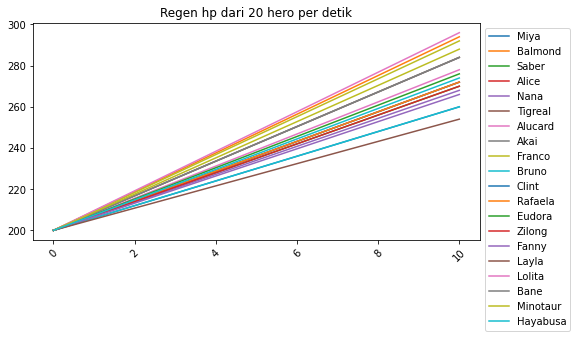

In [13]:
# visualisasi
fig, ax = plot.subplots(figsize=(8,4))

dval = dhp_gen.drop(columns='nama')
dval = dval.drop(columns='regen')

dval = pd.DataFrame(dval.values.tolist(),index=dhp_gen['nama'].values.tolist())

xtick = dhp_gen.columns.tolist()

display(dval)

#xtick.remove('nama')
#xtick.remove('regen')

for i,val in dval.T.items():
    ax.plot(val,label=str(i))
    
ax.legend(bbox_to_anchor=(1,1))

## set x tick
label = ax.get_xticklabels()
plot.setp(label,rotation=45)

ax.set_title('Regen hp dari 20 hero per detik')

plot.show()

## Data item

In [14]:
# read item
dataitem = pd.read_csv('MobileLegend\\Item.csv',delimiter=';',index_col=0)

#djd

#split and change to tuple
dataitem['attribut'] = dataitem['attribut'].str.split(',').tolist()

dataitem

,nama item,cost,tipe item,attribut,efek unik
kd,,,,,
1,Sea Halbert,2350,Attack,"[phy att_80, att spd_25]",BA -50% regen 3s
2,Rose Gold Meteor,2120,Attack,"[phy att_60, mag def_30, phy lifesteal_5]","HP<30% Sh 510-1350(level) 3s,cooldown_40s"
3,Hunter Strike,2010,Attack,"[phy att_80, cooldown_10]","PPEN 15,D 5x mov spd_30%, CD --"
4,Bloodlust Axe,1970,Attack,"[phy att_70, cooldown_10]",20 SV
5,Blade of Heptaseas,1950,Attack,"[phy att_70, hp_250]","PPEN 15,no D 5s>BA"
6,Blade of Despair,3010,Attack,"[phy att_160, mov spd_5]",HPEnemy<50% phy att_H 25% 2s
7,Scarlet Phantom,2020,Attack,"[phy att_30, att spd_20, crit chance_25]",Crit Hit att spd_Hero 30% and Crit Chance 5% 2s
8,Windtalker,1870,Attack,"[att spd_40, mov spd_20, crit chance_10]","5-3s BA hit 3 enemy, cooldown_turun"
9,Bersekers Fury,2350,Attack,"[phy att_65, crit chance_25]","CritD 40,CritHit tambah PAHero 5% 2s"


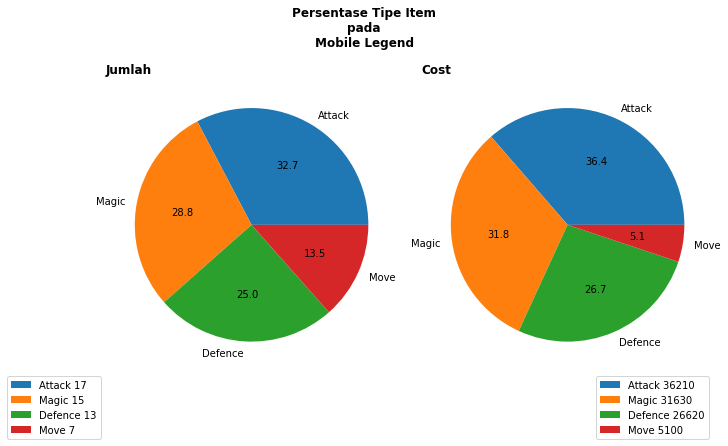

In [15]:
#- visualisasi dengan pie

# set data
labelsi = dataitem['tipe item'].value_counts().index
value = dataitem['tipe item'].value_counts().values

# jumlah cost tiap tipe item
valuecost = [dataitem[dataitem['tipe item'] == i].iloc[:]['cost'].sum() for i in labelsi]
#print(valuecost)

full = [labelsi[i]+' '+str(value[i]) for i in range(0,len(labelsi))]
fullcost = [labelsi[i]+' '+str(valuecost[i]) for i in range(0,len(labelsi))]

#print(full)

#-figure
fig, (ax,ax2) = plot.subplots(1,2,figsize=(10,6),constrained_layout=True)
#fig.text(0,0.2,'Jumlah Item '+ str(value.sum())+'\ndengan rincian:',linespacing=1.5,fontsize=14)
fig.suptitle('Persentase Tipe Item\npada\nMobile Legend',fontweight='bold')

# ax1 persentase berdasarkan jumlah tiap tipe item
ax.set_title('Jumlah',fontweight='bold',loc='left')
ax.pie(value,labels=labelsi,autopct="%1.1f")
ax.legend(labels=full,bbox_to_anchor=(0,0))

# ax2 persentase berdasarkan jumlah tiap cost
ax2.set_title('Cost',fontweight='bold',loc='left')
ax2.pie(valuecost,labels=labelsi,autopct="%1.1f")
ax2.legend(labels=fullcost,bbox_to_anchor=(1,0))

plot.show()

In [43]:
# var attname
attname = []

#iterasi data kolom attribute dan ambil semua sub attribut item
for i,daray in dataitem['attribut'].items():
    #kolom attribute
    for j in daray:
        attname.append(j.split('_')[0])

# set var unique att and create dataframe nol with colom unique
colAtt = set(attname)
datadetailitem = pd.DataFrame([],index=dataitem['attribut'].index)

# buat kolom baru berdasar nilai kolom atribut dan beri nilai 0   
for i in colAtt:
    datadetailitem[i] = 0

# ubah kolom att spd jadi tipe float
datadetailitem['att spd'] = datadetailitem['att spd'].astype('float64')

datadetailitem

,mag pow,mag pen,crit chance,mag def,phy lifesteal,crit redux,hp regen,cooldown,mana,mov spd,mag lifesteal,mana regen,phy def,att spd,phy att,hp
kd,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0


In [44]:
# update data detail sesuai kolom attribut
for i,daray in dataitem['attribut'].items():
    #kolom attribute yg telah displit
    for j in daray:
        #print(j.split('_')[0]+'|'+j.split('_')[1])
        #print(datadetailitem[j.split('_')[0]][i])
        datadetailitem[j.split('_')[0]][i] = int(j.split('_')[1])/100 if j.split('_')[0] == 'att spd' else int(j.split('_')[1])
        #print(int(j.split('_')[1])/100) if j.split('_')[0] == 'att spd' else print('none')
#colAtt
datadetailitem

c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,mag pow,mag pen,crit chance,mag def,phy lifesteal,crit redux,hp regen,cooldown,mana,mov spd,mag lifesteal,mana regen,phy def,att spd,phy att,hp
kd,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,80,0
2,0,0,0,30,5,0,0,0,0,0,0,0,0,0.00,60,0
3,0,0,0,0,0,0,0,10,0,0,0,0,0,0.00,80,0
4,0,0,0,0,0,0,0,10,0,0,0,0,0,0.00,70,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,70,250
6,0,0,0,0,0,0,0,0,0,5,0,0,0,0.00,160,0
7,0,0,25,0,0,0,0,0,0,0,0,0,0,0.20,30,0
8,0,0,10,0,0,0,0,0,0,20,0,0,0,0.40,0,0
9,0,0,25,0,0,0,0,0,0,0,0,0,0,0.00,65,0


In [45]:
#showing data
# join data item and data detail item
djid = pd.concat([dataitem,datadetailitem],axis=1)

#-select data column
ascend = 'att spd' #-> select one(jangan lupa ditambahkan pada var showdatasecond)
except_null = True # bolehkan nilai nol

showdataprimer = ['nama item', 'cost', 'tipe item']
showdatasecond = ['att spd','hp']
showdata = showdataprimer+showdatasecond
#primary,  ascend
#nama item, cost, tipe item, attribut, efek unik

# secondary, ascend
#
'''
'att spd',
cooldown,
crit chance,
crit redux,
hp,
hp regen,
mag def,
mag lifesteal,
mag pen,
mag pow,
mana,
mana regen,
mov spd,
phy att,
phy def,
phy lifesteal
'''

djid_showing = djid[showdata] if ascend == '' else djid[showdata].sort_values(ascend,ascending=False)

#djid_showing[(djid_showing['tipe item'] == 'Attack')& (djid_showing['cost'] <= 2000)]

djid_showing

,nama item,cost,tipe item,att spd,hp
kd,,,,,
8,Windtalker,1870,Attack,0.40,0
46,Swift Boots,710,Move,0.40,0
29,Feather of Heaven,2030,Magic,0.30,0
13,Golden Staff,2100,Attack,0.30,0
16,Demon Hunter Sword,2180,Attack,0.25,0
14,Wind of Nature,1910,Attack,0.25,0
1,Sea Halbert,2350,Attack,0.25,0
15,Corrosion Scythe,2050,Attack,0.25,0
7,Scarlet Phantom,2020,Attack,0.20,0


In [19]:
#-Visualisasi


In [113]:
# hero dengan 5 item berbeda

# data atribut dan beserta valuenya
djid_full = djid[['nama item','cost']+[i for i in colAtt]]
print('Data item beserta atributnya')
#display(djid_full)

# data hero dan atributnya
djd_full = djd[['Nama']+column_tambahan_full]
print('Data hero beserta atributnya')
#display(djd_full)

#- create dataframe hero dan item
choice_hero = 'Miya' 
choice_item = ['Sea Halbert','Blade of Heptaseas'] # ambil nama item yg ingin dipakai


dhat_choice_hero = djd_full.iloc[0]

dhat_choice_item = pd.DataFrame([djid_full[djid_full['nama item'] == ci].values[0] for ci in choice_item],
                                columns=djid_full.columns)

# add attribute to att hero
att_to_hero = []
#[dct['nama item']]+[dct['cost']]+[dhat_choice_hero[ca] + dct[ca] for ca in colAtt]
for i,dct in dhat_choice_item.iterrows():
    cs = [dhat_choice_hero[ca] + dct[ca] for ca in colAtt]
    att_to_hero.append(cs)

dath = pd.DataFrame(att_to_hero,columns=[ca for ca in colAtt])
dath = dath.cumsum()

# insert column nama hero
dath.insert(0,'nama item',dhat_choice_item['nama item'].tolist())

# append 
dath = dath.append(
    pd.DataFrame([pd.Series(['no item']+[dhat_choice_hero[ca] for ca in colAtt]).tolist()],columns=['nama item']+[ca for ca in colAtt]),
ignore_index=True)

display(dhat_choice_hero)
display(dhat_choice_item)

display(dath)

Data item beserta atributnya
Data hero beserta atributnya


Nama             Miya
hp               2524
mana              445
hp regen            6
mana regen          3
mov spd           240
att spd          0.85
cooldown            0
crit chance         0
spell vamp          0
phy att           100
phy def            17
phy pen             0
phy lifesteal       0
mag pow             0
mag def            15
mag pen             0
mag lifesteal       0
crit redux          0
Name: 20090101, dtype: object

,nama item,cost,mag pow,mag pen,crit chance,mag def,phy lifesteal,crit redux,hp regen,cooldown,mana,mov spd,mag lifesteal,mana regen,phy def,att spd,phy att,hp
0,Sea Halbert,2350,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,80,0
1,Blade of Heptaseas,1950,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,70,250


,nama item,mag pow,mag pen,crit chance,mag def,phy lifesteal,crit redux,hp regen,cooldown,mana,mov spd,mag lifesteal,mana regen,phy def,att spd,phy att,hp
0,Sea Halbert,0,0,0,15,0,0,6.0,0,445,240,0,3.0,17,1.10,180,2524
1,Blade of Heptaseas,0,0,0,30,0,0,12.0,0,890,480,0,6.0,34,1.95,350,5298
2,no item,0,0,0,15,0,0,6.0,0,445,240,0,3.0,17,0.85,100,2524
